In [16]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import fix_yahoo_finance as yf

In [17]:
Df = yf.download('AAPL', '2008-01-01', '2018-07-08')

[*********************100%***********************]  1 of 1 downloaded


In [18]:
Df=Df[['Close']]

In [19]:
Df.tail()

,Close
Date,
2018-06-29,185.110001
2018-07-02,187.179993
2018-07-03,183.919998
2018-07-05,185.399994
2018-07-06,187.970001


In [20]:
Df= Df.dropna()

In [21]:
Df.Close.plot(figsize=(15,10))

In [22]:
plt.title('Apple')
plt.ylabel('Price')

Text(0,0.5,'Price')

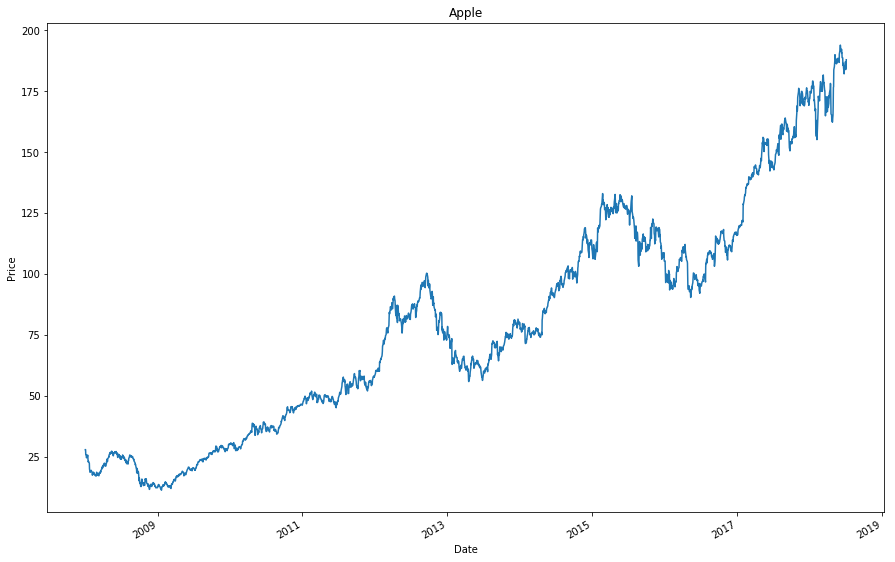

In [23]:
plt.show()

In [24]:
Df['SMA_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['SMA_9'] = Df['Close'].shift(1).rolling(window=9).mean()
Df= Df.dropna()
X = Df[['SMA_3','SMA_9']]
X.head()

,SMA_3,SMA_9
Date,,
2008-01-15,25.213810,25.834921
2008-01-16,24.786191,25.425397
2008-01-17,24.164762,24.865238
2008-01-18,23.312857,24.561111
2008-01-22,22.947142,24.302698


In [25]:
y = Df['Close']
y.head()

Date
2008-01-15    24.148571
2008-01-16    22.805714
2008-01-17    22.984285
2008-01-18    23.051428
2008-01-22    22.234285
Name: Close, dtype: float64

In [26]:
t=.8
t= int(t*len(Df))
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [27]:
## Create Linear regression Model
linear = LinearRegression().fit(X_train,y_train)
print ("Price =", round(linear.coef_[0],2), \
"* 3SMA", round(linear.coef_[1],2), \
"* 9SMA +", round(linear.intercept_,2))

Price = 1.2 * 3SMA -0.2 * 9SMA + 0.11


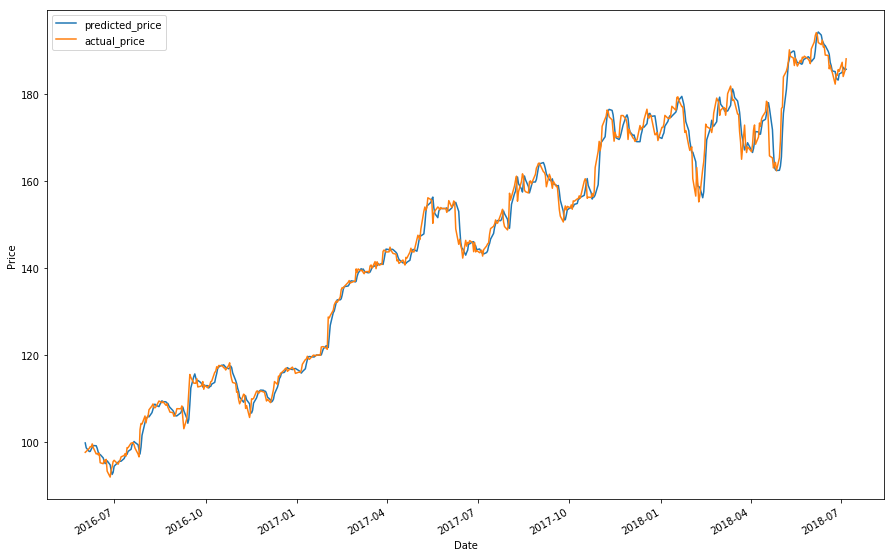

In [28]:
p_price = linear.predict(X_test)
p_price = pd.DataFrame(p_price,index=y_test.index,columns = ['price'])
p_price.plot(figsize=(15,10))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Price")
plt.show()
                                                             

In [29]:
r2 = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2))

99.31